# Imports

In [49]:
import os
import base64
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [50]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num of gpus Available: ', len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num of gpus Available:  1


In [51]:
current_dir = os.getcwd()
current_dir

'/workspace/Tensorflow'

# Preprocessing

In [52]:
(training_images,training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [53]:
print(f"""train images shape: {training_images.shape}
training labels shape: {training_labels.shape}
test images shape: {test_images.shape}
test labels shape: {test_labels.shape}""")

train images shape: (60000, 28, 28)
training labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


In [54]:
training_images = np.expand_dims(training_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)




In [55]:
print(f"""train images shape: {training_images.shape}
training labels shape: {training_labels.shape}
test images shape: {test_images.shape}
test labels shape: {test_labels.shape}""")

train images shape: (60000, 28, 28, 1)
training labels shape: (60000,)
test images shape: (10000, 28, 28, 1)
test labels shape: (10000,)


In [ ]:
training_images = training_images.astype('float32') / 255
print(training_images.max())
print(training_images.min())

1.0
0.0


# Early Stopping Callback

In [57]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs='accuracy'):        
        # Check if the accuracy is greater or equal to 0.995
        if logs['accuracy'] >= 0.995:
                            
            # Stop training once the above condition is met
            self.model.stop_training = True

            print("\nReached 99.5% accuracy so cancelling training!") 
    

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(training_images, training_labels, epochs=10, callbacks=EarlyStoppingCallback())

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9000 - loss: 0.3527     
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9788 - loss: 0.0711
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9842 - loss: 0.0518       
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0405    
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0270     
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9933 - loss: 0.0224  
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9948 - loss: 0.0175  
Epoch 9/10
 734/1875 ━━━━━━━━━━━━━━━━━━━━ 4:40:12 15s/step - accuracy: 0.9963 - loss: 0.0131
Reached 99.5% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9958 - loss: 0.0143     


In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       108,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,432 (1.25 MB)

 Trainable params: 108,810 (425.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 217,622 (850.09 KB)

# Predict

(1, 28, 28, 1)


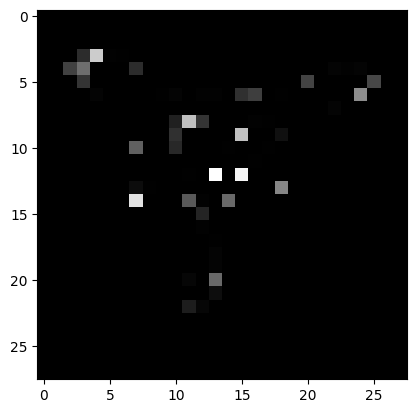

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Scores:
[[9.0791236e-06 6.6137230e-01 1.8584968e-03 3.2401697e-03 9.4351062e-06
  3.3058652e-01 4.4749660e-05 2.8492385e-03 1.3825024e-07 2.9724422e-05]]
Prediction: 1


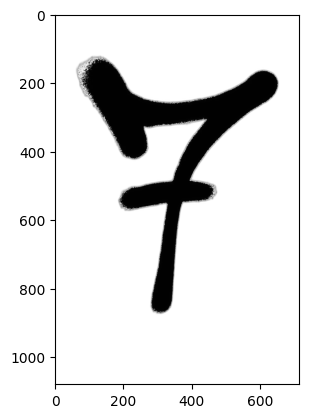

In [78]:
from rembg import remove
from PIL import Image
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# --- Define Model Input Size ---
# Replace with the actual height and width your model expects
img_height = 28
img_width = 28

# --- Image Path ---
input_path = '/workspace/images/graffiti-style-digit-7-with-a-sp.jpg'
output_path = '/workspace/images/graffiti-style-digit-7-with-a-sp.png'

# load image and remove background
input_image = Image.open(input_path)
output_image = remove(input_image)
output_image.save(output_path)

# --- Step 1: Load Image with correct target size ---
# load_img returns a PIL Image object
img = tf.keras.utils.load_img(output_path, target_size=(img_height, img_width), color_mode='grayscale')

# --- Step 2: Convert PIL Image to NumPy array ---
# img_to_array converts PIL image to NumPy array with shape (height, width, channels)
img_array = tf.keras.utils.img_to_array(img)

# --- Step 3: Add Batch Dimension ---
# Expand dims to create a batch of 1: shape becomes (1, height, width, channels)
img_batch = np.expand_dims(img_array, axis=0)

# --- Step 4: Preprocess the Image ---
# CRITICAL: This step MUST match how the training data was preprocessed.
# Example 1: Simple scaling to [0, 1] range
img_preprocessed = img_batch / 255.0


# After Step 4
print(img_preprocessed.shape) # Should be (1, 28, 28, 1)
plt.imshow(img_preprocessed.squeeze(), cmap='gray') # .squeeze() removes the batch/channel dims for display
plt.show()

# Example 2: Using a model-specific preprocessing function (e.g., for ResNet50)
# img_preprocessed = preprocess_input(img_batch) # Use this if applicable to your model

# --- Step 5: Make Prediction ---
# Now pass the correctly formatted and preprocessed batch to the model
prediction_scores = model.predict(img_preprocessed)

# --- Step 6: Process/Print Predictions ---
print("Prediction Scores:")
print(prediction_scores)

# --- Step 7: Interpret the Prediction ---
pred_score_index = np.argmax(prediction_scores)
print(f"""Prediction: {class_names[pred_score_index]}""")

plt.imshow(output_image)